## Simple Linear Regression with Scikit-learn

Given an input vector $X^T = (X_1, X_2,...,X_p)$, we want to predict an output $Y$. The linear regression model has the form:

$$
f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j 
$$

For this project, I will use the following data set: [Source](http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv) 

The advertising dataset captures sales revenue generated with respect to advertisement spending across multiple channles including radio, tv and newspaper.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#load data
advert = pd.read_csv('Advertising.csv')

In [3]:
advert.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df = advert.drop(['Unnamed: 0'], axis=1)

### Exploratory Data Analysis

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


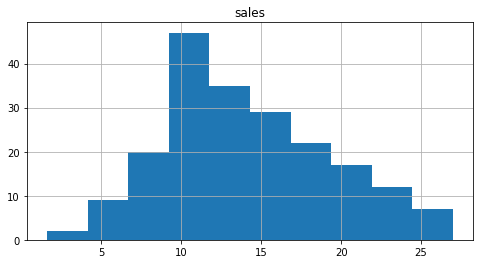

In [8]:
# Initialize figure and axis
fig, ax = plt.subplots(figsize=(8,4))

# Plot histogram 
df.hist(column="sales", ax=ax);

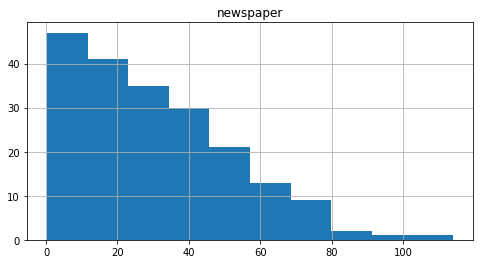

In [9]:
# Initialize figure and axis
fig, ax = plt.subplots(figsize=(8,4))

# Plot histogram 
df.hist(column="newspaper", ax=ax);

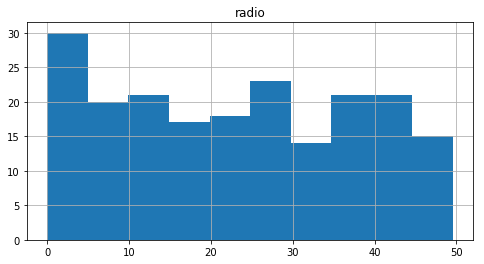

In [10]:
# Initialize figure and axis
fig, ax = plt.subplots(figsize=(8,4))

# Plot histogram 
df.hist(column="radio", ax=ax);

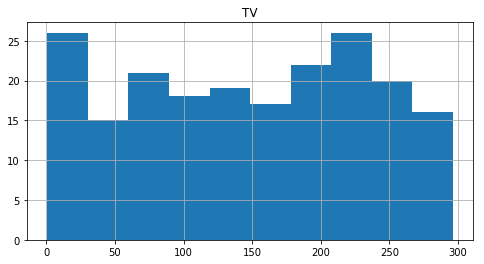

In [11]:
# Initialize figure and axis
fig, ax = plt.subplots(figsize=(8,4))

# Plot histogram 
df.hist(column="TV", ax=ax);

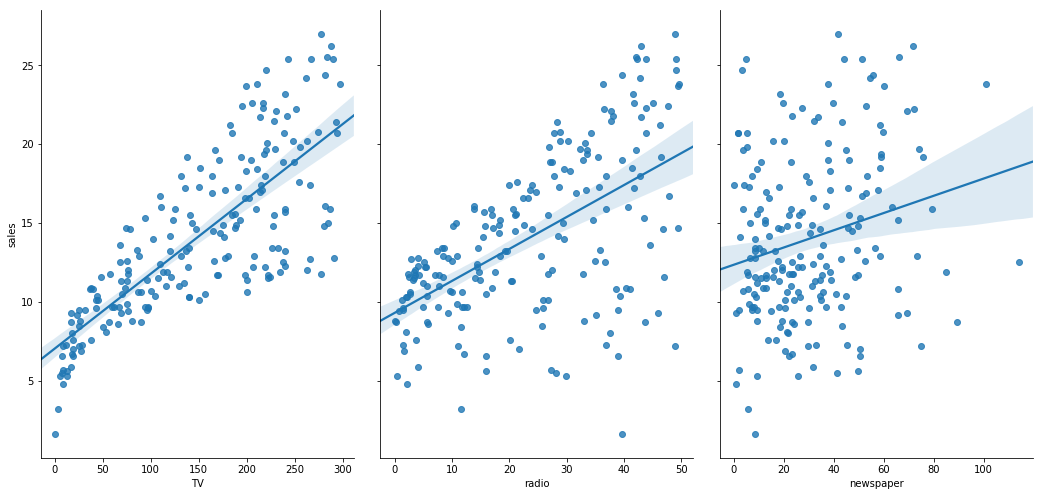

In [12]:
#explore relationships between predictors and response variables
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=7, aspect=0.7, 
             kind='reg');

In [13]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


The above matrix shows the computed pairwise correlation of columns in the data set. We can see that TV advertisements are the most correlated with sales.

### Creating the SLR Model

In [14]:
#prepare data for scikit learn 
X = df[['TV']]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [15]:
y = df.sales

In [31]:
"""
Create training and test splits for the training of the model. We first split the data into a training and test 
set evalaute geenralization performance. 
"""

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150,)
(50,)


In [33]:
#create the model by importing and instatiating the class

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
#look at intercepts and co-efficents
print(linreg.intercept_) #beta zero
print(linreg.coef_) #beta 1; spending on tv ads increases sales

6.91197261886872
[0.04802945]


### Making Predictions with the Model

In [35]:
y_pred = linreg.predict(X_test)
y_pred[:5] #numpy arrays, so cannot use head

array([17.03658069, 16.63793625, 11.50839099, 20.36982452, 19.10184704])

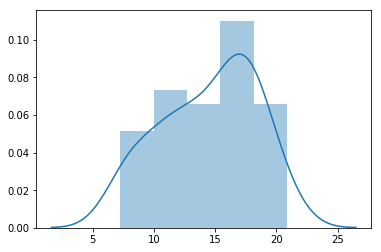

In [36]:
sns.distplot(y_pred);

In [37]:
print(linreg.intercept_)

6.91197261886872


In [38]:
print(linreg.coef_)

[0.04802945]


y_pred is a numpy array that contains all the predicted values for the input values in the X_test series.

We can compare the actual output values for X_test with the predicted values:

In [39]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
58,23.8,17.036581
40,16.6,16.637936
34,9.5,11.508391
102,14.8,20.369825
184,17.6,19.101847
198,25.5,20.533125
95,16.9,14.755182
4,12.9,15.595697
29,10.5,10.302852
168,17.1,17.257516


Though the model is not perfect, the predicted values are reasonably close to the actual ones.

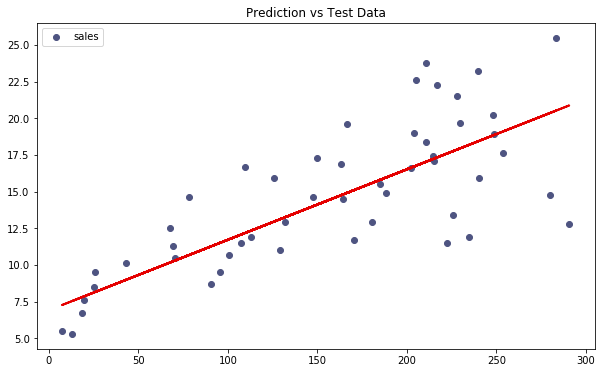

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="xkcd:dusk",marker='o')
plt.plot(X_test, y_pred, color='xkcd:red', linewidth=2,)
ax.set_facecolor('xkcd:pale grey')
plt.title('Prediction vs Test Data')
plt.legend()
plt.show()

### Model Evaluation 

In [41]:
#Scores are between 0 and 1, with a larger score indicating a better fit.
print("Test set accuracy: {:.2f}".format(linreg.score(X_test, y_test)))

Test set accuracy: 0.56


In [42]:
print("Training set accuracy: {:.2f}".format(linreg.score(X_train, y_train)))

Training set accuracy: 0.62


An $R^2$ of 0.56 is not great, but the scores for the training and test sets are pretty close. It could be that there is some underfitting going on. This is common since the model is very simple and restricted.  

We can also use the mean of the absolute value of the errors of the test set and the predictions:
$$ \frac{1}{n} \sum_{i=1}^{n} \left |y_i - \hat{y}_i \right |$$

In [43]:
from sklearn import metrics 
mae = metrics.mean_absolute_error(y_test, y_pred)
print(mae)

2.4643080986027908


And now the square root of the mean of the squared errors:
$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

In [44]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(rmse)

3.210929707703542
